### Benchmarking our Algorithm

Here, we will be running some tests on our algorithim and making changes to it.

**Note These tests are ran on:** 

**CPU:**

- 13th Gen Intel(R) Core(TM) i7-13620H
- Base speed:           2.40 GHz
- Sockets:	            1
- Cores:	            10
- Logical processors:	16



#### Define Sample Level Map:
- We shall make a sample map(later on we will develop a procedurally generated one.)
- We shall import in all the libraries we need to test

In [2]:
import heapq
from time import perf_counter
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


level_0 = [
    ["E", "#", "#", "#", "#", "#", "#", "#", "#", "0", "0", "0", "0", "0", "L", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "#", "#", "#", "#", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"],
]

level_1 = [
    ["E", "#", "#", "#", "#", "#", "#", "#", "#", "0", "0", "0", "0", "0", "L", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "#", "#", "#", "#", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"],
]

level_2 = [
    ["E", "#", "#", "#", "#", "#", "#", "#", "#", "0", "0", "0", "0", "0", "L", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "0", "0", "0", "0", "0", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "#", "#", "#", "#", "#", "#", "0", "#", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"],
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"],
]
grid = [level_0, level_1, level_2]


#### Helper Functions:

In [ ]:
# Node class for all algorithms
class Node:
    def __init__(self, x, y, level, parent=None, g=0, h=0):
        self.x = x
        self.y = y
        self.level = level
        self.parent = parent
        self.g = g
        self.h = h
        self.f = g + h

    def __lt__(self, other):
        return self.f < other.f


#### Comparing Different Heuristics (A*):

Manhattan Heuristic (average over 10 runs):
Execution Time: 5.5179999799293e-05 seconds
Nodes Expanded: 17.0
Neighbors Evaluated: 48.0

Octile Heuristic (average over 10 runs):
Execution Time: 0.0002294199999596458 seconds
Nodes Expanded: 49.0
Neighbors Evaluated: 143.0

Euclidean Heuristic (average over 10 runs):
Execution Time: 0.0002658299999893643 seconds
Nodes Expanded: 41.0
Neighbors Evaluated: 118.0



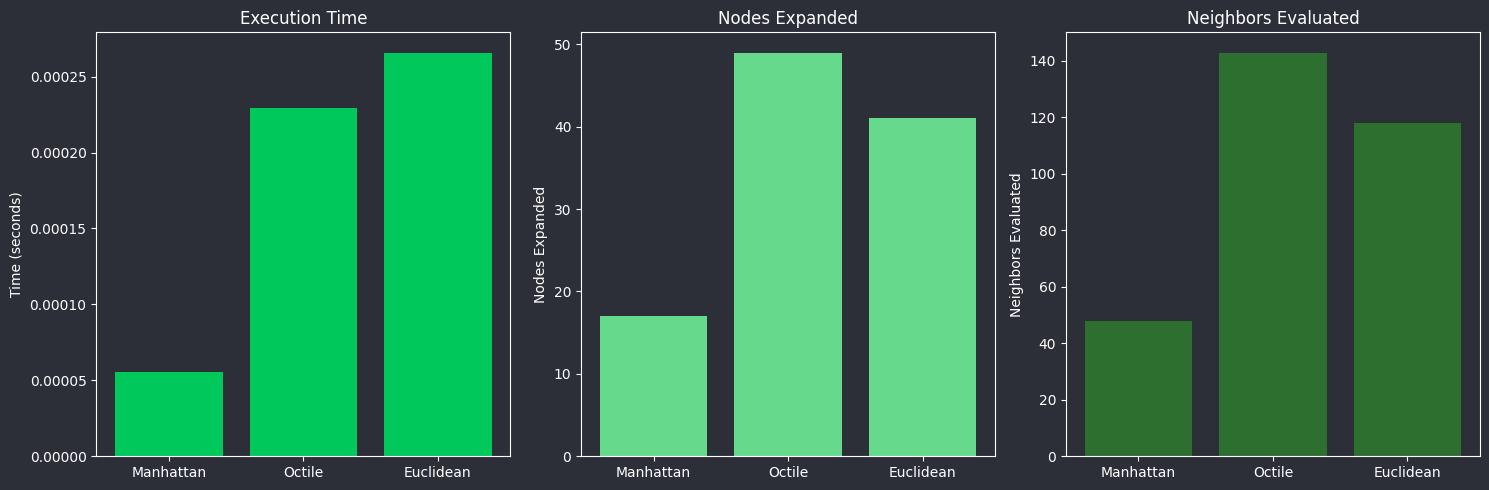

In [ ]:
start = (1, 1, 0)  # Random or fixed start position
goal = (10, 10, 2)  # Random or fixed goal position

# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def manhattan_heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

def octile_heuristic(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    return max(dx, dy) + (2**0.5 - 2) * min(dx, dy)

def euclidean_heuristic(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    return (dx**2 + dy**2)**0.5

# Get neighbors function
def get_neighbors(node):
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Four main directions

    # Check for normal neighbors (horizontal/vertical)
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Cost of 1 for horizontal/vertical moves

    # Prioritize lifts over escalators for multi-level traversal
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        if x == wx and y == wy and level == from_lvl:
            if grid[from_lvl][wx][wy] == "L":  # Lift: priority for multi-level traversal
                neighbors.append((wx, wy, to_lvl, 1))  # Lift with standard cost
            elif grid[from_lvl][wx][wy] == "E" and abs(from_lvl - to_lvl) == 1:  # Escalator: use for adjacent levels
                neighbors.append((wx, wy, to_lvl, 0.5))  # Escalator with cost 0.5 for adjacent levels

    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

def astar(start, goal, heuristic_func):
    open_set = []
    start_node = Node(*start, None, 0, heuristic_func(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0  # Track the number of nodes expanded
    evaluated_neighbors = 0  # Track the number of neighbors evaluated

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor  # Unpack cost
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost  # Use variable cost
            new_node = Node(nx, ny, nlevel, current, new_g, heuristic_func((nx, ny, nlevel), goal))

            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, new_node)
    return None, expanded_nodes, evaluated_neighbors

# Benchmarking Code for Different Heuristics
heuristics = [manhattan_heuristic, octile_heuristic, euclidean_heuristic]
heuristic_names = ["Manhattan", "Octile", "Euclidean"]

execution_times = []
expanded_nodes_list = []
evaluated_neighbors_list = []

# Run multiple times with random start and goal positions
num_runs = 10  # Number of random tests

for heuristic_func, name in zip(heuristics, heuristic_names):
    total_execution_time = 0
    total_expanded_nodes = 0
    total_evaluated_neighbors = 0
    
    for _ in range(num_runs):        
        start_time = perf_counter()
        
        # Running A* pathfinding with each heuristic
        path, expanded_nodes, evaluated_neighbors = astar(start, goal, heuristic_func)
        
        end_time = perf_counter()
        execution_time = end_time - start_time
        
        total_execution_time += execution_time
        total_expanded_nodes += expanded_nodes
        total_evaluated_neighbors += evaluated_neighbors

    # Calculate averages for this heuristic
    avg_execution_time = total_execution_time / num_runs
    avg_expanded_nodes = total_expanded_nodes / num_runs
    avg_evaluated_neighbors = total_evaluated_neighbors / num_runs

    execution_times.append(avg_execution_time)
    expanded_nodes_list.append(avg_expanded_nodes)
    evaluated_neighbors_list.append(avg_evaluated_neighbors)

    print(f"{name} Heuristic (average over {num_runs} runs):")
    print(f"Execution Time: {avg_execution_time} seconds")
    print(f"Nodes Expanded: {avg_expanded_nodes}")
    print(f"Neighbors Evaluated: {avg_evaluated_neighbors}")
    print()

# Plotting the results with Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot execution times
ax[0].bar(heuristic_names, execution_times, color='#00C85B')  # green color
ax[0].set_title("Execution Time", color='white')
ax[0].set_ylabel("Time (seconds)", color='white')
ax[0].set_facecolor('#2c2f38')  # Dark background for each subplot
ax[0].tick_params(axis='both', labelcolor='white')

# Plot nodes expanded
ax[1].bar(heuristic_names, expanded_nodes_list, color='#66D98C')  # Light green shade
ax[1].set_title("Nodes Expanded", color='white')
ax[1].set_ylabel("Nodes Expanded", color='white')
ax[1].set_facecolor('#2c2f38')  # Dark background for each subplot
ax[1].tick_params(axis='both', labelcolor='white')

# Plot neighbors evaluated
ax[2].bar(heuristic_names, evaluated_neighbors_list, color='#2D6F2F')  # Darker green shade
ax[2].set_title("Neighbors Evaluated", color='white')
ax[2].set_ylabel("Neighbors Evaluated", color='white')
ax[2].set_facecolor('#2c2f38')  # Dark background for each subplot
ax[2].tick_params(axis='both', labelcolor='white')

# Additional figure settings for clean
plt.tight_layout()
fig.patch.set_facecolor('#2c2f38')  # Dark background for the figure itself

# Show the plot
plt.show()


In [ ]:
# Detect waypoints dynamically (assuming grid is defined)
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))
            elif grid[level][x][y] == "L":
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))

# Manhattan heuristic for A* and Greedy Best-First
def manhattan_heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

# Get neighbors function (shared across algorithms)
def get_neighbors(node):
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))

    for (wx, wy, from_lvl, to_lvl) in waypoints:
        if x == wx and y == wy and level == from_lvl:
            if grid[from_lvl][wx][wy] == "L":
                neighbors.append((wx, wy, to_lvl, 1))
            elif grid[from_lvl][wx][wy] == "E" and abs(from_lvl - to_lvl) == 1:
                neighbors.append((wx, wy, to_lvl, 0.5))

    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

# A* with Manhattan heuristic
def astar_manhattan(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, manhattan_heuristic(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0
    evaluated_neighbors = 0

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost
            new_node = Node(nx, ny, nlevel, current, new_g, manhattan_heuristic((nx, ny, nlevel), goal))

            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, new_node)
    return None, expanded_nodes, evaluated_neighbors

# Dijkstra’s Algorithm
def dijkstra(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, 0)
    heapq.heappush(open_set, (0, start_node))
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0
    evaluated_neighbors = 0

    while open_set:
        _, current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost
            new_node = Node(nx, ny, nlevel, current, new_g, 0)

            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, (new_g, new_node))
    return None, expanded_nodes, evaluated_neighbors

# Greedy Best-First Search
def greedy_best_first(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, manhattan_heuristic(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0
    evaluated_neighbors = 0

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_node = Node(nx, ny, nlevel, current, 0, manhattan_heuristic((nx, ny, nlevel), goal))

            if (nx, ny, nlevel) not in node_map:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, new_node)
    return None, expanded_nodes, evaluated_neighbors

# Breadth-First Search (BFS)
def bfs(start, goal):
    from collections import deque
    queue = deque()
    start_node = Node(*start)
    queue.append(start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0
    evaluated_neighbors = 0

    while queue:
        current = queue.popleft()
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_node = Node(nx, ny, nlevel, current, current.g + cost, 0)

            if (nx, ny, nlevel) not in node_map:
                node_map[(nx, ny, nlevel)] = new_node
                queue.append(new_node)
    return None, expanded_nodes, evaluated_neighbors

# Benchmarking Code for Different Algorithms
algorithms = [astar_manhattan, dijkstra, greedy_best_first, bfs]
algorithm_names = ["A* Manhattan", "Dijkstra", "Greedy Best-First", "BFS"]

execution_times = []
expanded_nodes_list = []
evaluated_neighbors_list = []

# Run multiple times
num_runs = 10

for algo_func, name in zip(algorithms, algorithm_names):
    total_execution_time = 0
    total_expanded_nodes = 0
    total_evaluated_neighbors = 0
    
    for _ in range(num_runs):        
        start_time = perf_counter()
        
        # Running pathfinding with each algorithm
        path, expanded_nodes, evaluated_neighbors = algo_func((1, 1, 0), (5, 5, 2))
        
        end_time = perf_counter()
        execution_time = end_time - start_time
        
        total_execution_time += execution_time
        total_expanded_nodes += expanded_nodes
        total_evaluated_neighbors += evaluated_neighbors

    # Calculate averages for this algorithm
    avg_execution_time = total_execution_time / num_runs
    avg_expanded_nodes = total_expanded_nodes / num_runs
    avg_evaluated_neighbors = total_evaluated_neighbors / num_runs

    execution_times.append(avg_execution_time)
    expanded_nodes_list.append(avg_expanded_nodes)
    evaluated_neighbors_list.append(avg_evaluated_neighbors)

    print(f"{name} (average over {num_runs} runs):")
    print(f"Execution Time: {avg_execution_time:.6f} seconds")
    print(f"Nodes Expanded: {avg_expanded_nodes:.1f}")
    print(f"Neighbors Evaluated: {avg_evaluated_neighbors:.1f}")
    print()

# Create a DataFrame for the table
data = {
    "Algorithm": algorithm_names,
    "Execution Time (s)": [f"{t:.6f}" for t in execution_times],  # Format to 6 decimal places
    "Nodes Expanded": [f"{n:.1f}" for n in expanded_nodes_list],  # Format to 1 decimal place
    "Neighbors Evaluated": [f"{n:.1f}" for n in evaluated_neighbors_list]
}
df = pd.DataFrame(data)

df.head(100)

A* Manhattan (average over 10 runs):
Execution Time: 0.000161 seconds
Nodes Expanded: 52.0
Neighbors Evaluated: 156.0

Dijkstra (average over 10 runs):
Execution Time: 0.000412 seconds
Nodes Expanded: 144.0
Neighbors Evaluated: 471.0

Greedy Best-First (average over 10 runs):
Execution Time: 0.000642 seconds
Nodes Expanded: 228.0
Neighbors Evaluated: 781.0

BFS (average over 10 runs):
Execution Time: 0.000530 seconds
Nodes Expanded: 160.0
Neighbors Evaluated: 531.0



,Algorithm,Execution Time (s),Nodes Expanded,Neighbors Evaluated
0,A* Manhattan,0.000161,52.0,156.0
1,Dijkstra,0.000412,144.0,471.0
2,Greedy Best-First,0.000642,228.0,781.0
3,BFS,0.000530,160.0,531.0


#### 1st Improvement:
- Switch heuristic to Manhattan distance for faster calculations.

In [ ]:
# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

def get_neighbors(node):
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Default directions: horizontal and vertical on the same level

    # Check for normal neighbors (horizontal/vertical)
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Standard move with a cost of 1

    # Check for level transitions via escalators and lifts
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        # We are at the waypoint and it's an escalator or lift
        if x == wx and y == wy and level == from_lvl:
            if grid[from_lvl][wx][wy] == "E" and abs(from_lvl - to_lvl) == 1:  # Escalator: adjacent level transition
                neighbors.append((wx, wy, to_lvl, 0.5))  # Escalator has a lower cost
            elif grid[from_lvl][wx][wy] == "L":  # Lift: allows for a direct level transition
                neighbors.append((wx, wy, to_lvl, 1))  # Lift with standard cost

    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

def astar(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, heuristic(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0  # Track the number of nodes expanded
    evaluated_neighbors = 0  # Track the number of neighbors evaluated

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor  # Unpack cost
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost  # Use variable cost
            new_node = Node(nx, ny, nlevel, current, new_g, heuristic((nx, ny, nlevel), goal))

            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, new_node)
    return None, expanded_nodes, evaluated_neighbors

# Benchmarking Code (Multiple Runs)
num_runs = 5  # Set the number of runs
start = (1, 1, 0) 
goal = (10, 10, 2)

total_execution_time = 0
total_expanded_nodes = 0
total_evaluated_neighbors = 0

for _ in range(num_runs):
    start_time = perf_counter()

    # Running A* pathfinding
    path, expanded_nodes, evaluated_neighbors = astar(start, goal)

    end_time = perf_counter()
    execution_time = end_time - start_time

    total_execution_time += execution_time
    total_expanded_nodes += expanded_nodes
    total_evaluated_neighbors += evaluated_neighbors

# Calculate averages
average_execution_time = total_execution_time / num_runs
average_expanded_nodes = total_expanded_nodes / num_runs
average_evaluated_neighbors = total_evaluated_neighbors / num_runs

# Output the averages
print(f"Average Execution Time: {average_execution_time:.6f} seconds")
print(f"Average Nodes Expanded: {average_expanded_nodes}")
print(f"Average Neighbors Evaluated: {average_evaluated_neighbors}")

Impr1 = [average_execution_time, average_expanded_nodes, average_evaluated_neighbors]


Average Execution Time: 0.002131 seconds
Average Nodes Expanded: 622.0
Average Neighbors Evaluated: 2213.0


#### 2nd Improvement:
- Change check priority from Lifts to Escalator.

In [ ]:
# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

def get_neighbors(node):
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Default directions: horizontal and vertical on the same level

    # Check for normal neighbors (horizontal/vertical) on the same level
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Standard move with a cost of 1

    # Check for level transitions via escalators and lifts
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        # We are at the waypoint and it's an escalator or lift
        if x == wx and y == wy and level == from_lvl:
            if grid[from_lvl][wx][wy] == "E" and abs(from_lvl - to_lvl) == 1:  # Escalator: adjacent level transition
                neighbors.append((wx, wy, to_lvl, 0.5))  # Escalator has a lower cost
            elif grid[from_lvl][wx][wy] == "L":  # Lift: allows for a direct level transition
                neighbors.append((wx, wy, to_lvl, 1))  # Lift with standard cost

    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

def astar(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, heuristic(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    expanded_nodes = 0  # Track the number of nodes expanded
    evaluated_neighbors = 0  # Track the number of neighbors evaluated

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor  # Unpack cost
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost  # Use variable cost
            new_node = Node(nx, ny, nlevel, current, new_g, heuristic((nx, ny, nlevel), goal))

            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                node_map[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set, new_node)
    return None, expanded_nodes, evaluated_neighbors

# Benchmarking Code (Multiple Runs)
num_runs = 5
total_execution_time = 0
total_expanded_nodes = 0
total_evaluated_neighbors = 0

for _ in range(num_runs):
    start_time = perf_counter()

    # Running A* pathfinding
    path, expanded_nodes, evaluated_neighbors = astar(start, goal)

    end_time = perf_counter()
    execution_time = end_time - start_time

    total_execution_time += execution_time
    total_expanded_nodes += expanded_nodes
    total_evaluated_neighbors += evaluated_neighbors

# Calculate averages
average_execution_time = total_execution_time / num_runs
average_expanded_nodes = total_expanded_nodes / num_runs
average_evaluated_neighbors = total_evaluated_neighbors / num_runs

# Output the averages
print(f"Average Execution Time: {average_execution_time:.6f} seconds")
print(f"Average Nodes Expanded: {average_expanded_nodes}")
print(f"Average Neighbors Evaluated: {average_evaluated_neighbors}")


Impr2 = [average_execution_time, average_expanded_nodes, average_evaluated_neighbors]


Average Execution Time: 0.002101 seconds
Average Nodes Expanded: 622.0
Average Neighbors Evaluated: 2213.0


#### 3rd Improvement:

- Limit and cache neighbor checks for more efficient pathfinding.
- Avoid duplicate nodes in the open set by checking if a node is already processed or if its cost is lower.
- Level based Dynamic Cost Modification for Elevator & Lift


In [ ]:
# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])


# Cache for neighbors
neighbor_cache = {}

def get_neighbors(node):
    # Check if neighbors are already cached
    key = (node.x, node.y, node.level)
    if key in neighbor_cache:
        return neighbor_cache[key]
    
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Default directions: horizontal and vertical on the same level

    # Check for normal neighbors (horizontal/vertical) on the same level
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Standard move with a cost of 1

    # Check for level transitions via escalators and lifts
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        if x == wx and y == wy and level == from_lvl:
            level_diff = abs(from_lvl - to_lvl)

            if level_diff == 1:  # Adjacent level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: cheaper for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 0.5))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: more expensive for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 1))
            else:  # Multiple level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: more expensive for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 2))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: cheaper for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 1))

    # Cache the neighbors for this node
    neighbor_cache[key] = neighbors

    return neighbors


def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

# Modify the A* algorithm to use the cached neighbors
def astar(start, goal):
    open_set = []
    start_node = Node(*start, None, 0, heuristic(start, goal))
    heapq.heappush(open_set, start_node)
    closed_set = set()
    node_map = {}
    
    # Counters for benchmarking
    expanded_nodes = 0  # Track the number of nodes expanded
    evaluated_neighbors = 0  # Track the number of neighbors evaluated

    while open_set:
        current = heapq.heappop(open_set)
        expanded_nodes += 1
        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors
        
        closed_set.add((current.x, current.y, current.level))

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor  # Unpack cost
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost  # Compute the new cost for this neighbor

            # Check if this neighbor has been processed and if the new cost is lower
            if (nx, ny, nlevel) not in node_map or new_g < node_map[(nx, ny, nlevel)].g:
                # Store the Node object, not just the cost
                node_map[(nx, ny, nlevel)] = Node(nx, ny, nlevel, current, new_g, heuristic((nx, ny, nlevel), goal))
                
                # Add the new node to the open set
                heapq.heappush(open_set, node_map[(nx, ny, nlevel)])

    return None, expanded_nodes, evaluated_neighbors


# Run the benchmarking and calculate averages
total_execution_time = 0
total_expanded_nodes = 0
total_evaluated_neighbors = 0
num_runs = 5  # Number of runs to get an average

for _ in range(num_runs):
    start_time = perf_counter()


    # Running A* pathfinding
    path, expanded_nodes, evaluated_neighbors = astar(start, goal)

    end_time = perf_counter()
    execution_time = end_time - start_time

    total_execution_time += execution_time
    total_expanded_nodes += expanded_nodes
    total_evaluated_neighbors += evaluated_neighbors

# Calculate averages
average_execution_time = total_execution_time / num_runs
average_expanded_nodes = total_expanded_nodes / num_runs
average_evaluated_neighbors = total_evaluated_neighbors / num_runs

# Output the averages
print(f"Average Execution Time: {average_execution_time:.6f} seconds")
print(f"Average Nodes Expanded: {average_expanded_nodes}")
print(f"Average Neighbors Evaluated: {average_evaluated_neighbors}")


Impr3 = [average_execution_time, average_expanded_nodes, average_evaluated_neighbors]


Average Execution Time: 0.001482 seconds
Average Nodes Expanded: 622.0
Average Neighbors Evaluated: 2213.0


#### Test : Hashmaps vs heapq
- We used hashmaps to improve the retrieval however, since pathfinding involves finding the smallest `f` value, we reverted back to using heapq as it is O(log n) which is faster when using hashmaps for finding the smallest possible value as it will still be O(n).



In [ ]:
# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])


# Cache for neighbors
neighbor_cache = {}

def get_neighbors(node):
    # Check if neighbors are already cached
    key = (node.x, node.y, node.level)
    if key in neighbor_cache:
        return neighbor_cache[key]
    
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Default directions: horizontal and vertical on the same level

    # Check for normal neighbors (horizontal/vertical) on the same level
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Standard move with a cost of 1

    # Check for level transitions via escalators and lifts
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        if x == wx and y == wy and level == from_lvl:
            level_diff = abs(from_lvl - to_lvl)

            if level_diff == 1:  # Adjacent level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: cheaper for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 0.5))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: more expensive for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 1))
            else:  # Multiple level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: more expensive for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 2))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: cheaper for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 1))

    # Cache the neighbors for this node
    neighbor_cache[key] = neighbors

    return neighbors

def reconstruct_path(node):
    path = []
    while node:
        path.append((node.x, node.y, node.level))
        node = node.parent
    return path[::-1]

# Modify the A* algorithm to use the cached neighbors
def astar(start, goal):
    open_set = {}  # Hash map to store nodes and their f values
    closed_set = {}  # Hash map to store nodes already processed
    
    start_node = Node(*start, None, 0, heuristic(start, goal))
    open_set[(start[0], start[1], start[2])] = start_node  # Store the start node

    # Dictionary to keep track of the best (lowest) cost node for each position
    best_node_costs = {}

    expanded_nodes = 0  # Track the number of nodes expanded
    evaluated_neighbors = 0  # Track the number of neighbors evaluated

    while open_set:
        # Get the node with the lowest f value (min f node)
        current = min(open_set.values(), key=lambda node: node.f)

        if (current.x, current.y, current.level) == goal:
            return reconstruct_path(current), expanded_nodes, evaluated_neighbors

        del open_set[(current.x, current.y, current.level)]  # Remove the node from open_set
        closed_set[(current.x, current.y, current.level)] = current  # Add to closed_set

        for neighbor in get_neighbors(current):
            nx, ny, nlevel, cost = neighbor  # Unpack cost
            evaluated_neighbors += 1

            if (nx, ny, nlevel) in closed_set:
                continue

            new_g = current.g + cost  # Compute the new cost for this neighbor

            # Check if this neighbor has been processed and if the new cost is lower
            if (nx, ny, nlevel) not in best_node_costs or new_g < best_node_costs[(nx, ny, nlevel)]:
                # Update the best cost for this position
                best_node_costs[(nx, ny, nlevel)] = new_g
                
                # Create a new node for the neighbor
                new_node = Node(nx, ny, nlevel, current, new_g, heuristic((nx, ny, nlevel), goal))
                
                # Add the new node to the open set
                open_set[(nx, ny, nlevel)] = new_node

                expanded_nodes += 1  # Increment the expanded node count

    return None, expanded_nodes, evaluated_neighbors



# Run the benchmarking and calculate averages
total_execution_time = 0
total_expanded_nodes = 0
total_evaluated_neighbors = 0
num_runs = 5  # Number of runs to get an average

for _ in range(num_runs):
    start_time = perf_counter()

    # Running A* pathfinding
    path, expanded_nodes, evaluated_neighbors = astar(start, goal)

    end_time = perf_counter()
    execution_time = end_time - start_time

    total_execution_time += execution_time
    total_expanded_nodes += expanded_nodes
    total_evaluated_neighbors += evaluated_neighbors

# Calculate averages
average_execution_time = total_execution_time / num_runs
average_expanded_nodes = total_expanded_nodes / num_runs
average_evaluated_neighbors = total_evaluated_neighbors / num_runs

# Output the averages
print(f"Average Execution Time: {average_execution_time:.6f} seconds")
print(f"Average Nodes Expanded: {average_expanded_nodes}")
print(f"Average Neighbors Evaluated: {average_evaluated_neighbors}")

Test1 = [average_execution_time, average_expanded_nodes, average_evaluated_neighbors]

Average Execution Time: 0.002076 seconds
Average Nodes Expanded: 586.0
Average Neighbors Evaluated: 2052.0


#### 4th Improvement:
- Bi Directional A*

In [ ]:
# Detect waypoints dynamically
waypoints = []
lifts = {}

for level in range(len(grid)):
    for x in range(len(grid[level])):
        for y in range(len(grid[level][x])):
            if grid[level][x][y] == "E":  # Escalator goes UP one level
                if level + 1 < len(grid) and grid[level + 1][x][y] == "E":
                    waypoints.append((x, y, level, level + 1))  # Normal escalator movement
            elif grid[level][x][y] == "L":  # Lift connects all levels
                if (x, y) not in lifts:
                    lifts[(x, y)] = []
                lifts[(x, y)].append(level)

# Convert lifts to allow direct travel between ALL levels
for (x, y), levels in lifts.items():
    for l1 in levels:
        for l2 in levels:
            if l1 != l2:
                waypoints.append((x, y, l1, l2))  # Now allows direct jumps via lift

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1]) + abs(a[2] - b[2])

# Cache for neighbors
neighbor_cache = {}

def get_neighbors(node):
    # Check if neighbors are already cached
    key = (node.x, node.y, node.level)
    if key in neighbor_cache:
        return neighbor_cache[key]
    
    neighbors = []
    x, y, level = node.x, node.y, node.level
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Default directions: horizontal and vertical on the same level

    # Check for normal neighbors (horizontal/vertical) on the same level
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid[level]) and 0 <= ny < len(grid[level][0]) and grid[level][nx][ny] != "#":
            neighbors.append((nx, ny, level, 1))  # Standard move with a cost of 1

    # Check for level transitions via escalators and lifts
    for (wx, wy, from_lvl, to_lvl) in waypoints:
        if x == wx and y == wy and level == from_lvl:
            level_diff = abs(from_lvl - to_lvl)

            if level_diff == 1:  # Adjacent level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: cheaper for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 0.5))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: more expensive for adjacent levels
                    neighbors.append((wx, wy, to_lvl, 1))
            else:  # Multiple level transition
                if grid[from_lvl][wx][wy] == "E":  # Escalator: more expensive for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 2))
                elif grid[from_lvl][wx][wy] == "L":  # Lift: cheaper for multi-level jumps
                    neighbors.append((wx, wy, to_lvl, 1))

    # Cache the neighbors for this node
    neighbor_cache[key] = neighbors

    return neighbors


def reconstruct_path(node_from_start, node_from_goal):
    # Reconstruct the path from the start to the meeting point and from the goal to the meeting point
    path_start = []
    path_goal = []
    
    while node_from_start:
        path_start.append((node_from_start.x, node_from_start.y, node_from_start.level))
        node_from_start = node_from_start.parent
        
    while node_from_goal:
        path_goal.append((node_from_goal.x, node_from_goal.y, node_from_goal.level))
        node_from_goal = node_from_goal.parent

    path_start.reverse()
    path_goal.reverse()

    # Merge paths (the meeting node is the common node between the two)
    return path_start + path_goal[1:]


def bidirectional_astar(start, goal):
    open_set_start = []
    open_set_goal = []
    start_node = Node(*start, None, 0, heuristic(start, goal))
    goal_node = Node(*goal, None, 0, heuristic(goal, start))
    
    heapq.heappush(open_set_start, start_node)
    heapq.heappush(open_set_goal, goal_node)
    
    closed_set_start = set()
    closed_set_goal = set()
    node_map_start = {}
    node_map_goal = {}
    
    expanded_nodes = 0
    evaluated_neighbors = 0
    
    while open_set_start and open_set_goal:
        # Forward direction search
        current_start = heapq.heappop(open_set_start)
        expanded_nodes += 1
        if (current_start.x, current_start.y, current_start.level) in closed_set_goal:
            meeting_node = current_start
            break
        
        closed_set_start.add((current_start.x, current_start.y, current_start.level))
        
        for neighbor in get_neighbors(current_start):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set_start:
                continue
            
            new_g = current_start.g + cost
            new_node = Node(nx, ny, nlevel, current_start, new_g, heuristic((nx, ny, nlevel), goal))
            
            if (nx, ny, nlevel) not in node_map_start or new_g < node_map_start[(nx, ny, nlevel)].g:
                node_map_start[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set_start, new_node)

        # Backward direction search
        current_goal = heapq.heappop(open_set_goal)
        expanded_nodes += 1
        if (current_goal.x, current_goal.y, current_goal.level) in closed_set_start:
            meeting_node = current_goal
            break
        
        closed_set_goal.add((current_goal.x, current_goal.y, current_goal.level))
        
        for neighbor in get_neighbors(current_goal):
            nx, ny, nlevel, cost = neighbor
            evaluated_neighbors += 1
            if (nx, ny, nlevel) in closed_set_goal:
                continue
            
            new_g = current_goal.g + cost
            new_node = Node(nx, ny, nlevel, current_goal, new_g, heuristic((nx, ny, nlevel), start))
            
            if (nx, ny, nlevel) not in node_map_goal or new_g < node_map_goal[(nx, ny, nlevel)].g:
                node_map_goal[(nx, ny, nlevel)] = new_node
                heapq.heappush(open_set_goal, new_node)

    return reconstruct_path(node_map_start[(meeting_node.x, meeting_node.y, meeting_node.level)], node_map_goal[(meeting_node.x, meeting_node.y, meeting_node.level)]), expanded_nodes, evaluated_neighbors


# Run the benchmarking and calculate averages
total_execution_time = 0
total_expanded_nodes = 0
total_evaluated_neighbors = 0
num_runs = 5  # Number of runs to get an average

for _ in range(num_runs):
    start_time = perf_counter()

    # Running Bidirectional A* pathfinding
    path, expanded_nodes, evaluated_neighbors = bidirectional_astar(start, goal)

    end_time = perf_counter()
    execution_time = end_time - start_time

    total_execution_time += execution_time
    total_expanded_nodes += expanded_nodes
    total_evaluated_neighbors += evaluated_neighbors

# Calculate averages
average_execution_time = total_execution_time / num_runs
average_expanded_nodes = total_expanded_nodes / num_runs
average_evaluated_neighbors = total_evaluated_neighbors / num_runs

# Output the averages
print(f"Average Execution Time: {average_execution_time:.6f} seconds")
print(f"Average Nodes Expanded: {average_expanded_nodes}")
print(f"Average Neighbors Evaluated: {average_evaluated_neighbors}")


Impr4 = [average_execution_time, average_expanded_nodes, average_evaluated_neighbors]


Average Execution Time: 0.000907 seconds
Average Nodes Expanded: 222.0
Average Neighbors Evaluated: 759.0


#### Benchmarking All our improvements:

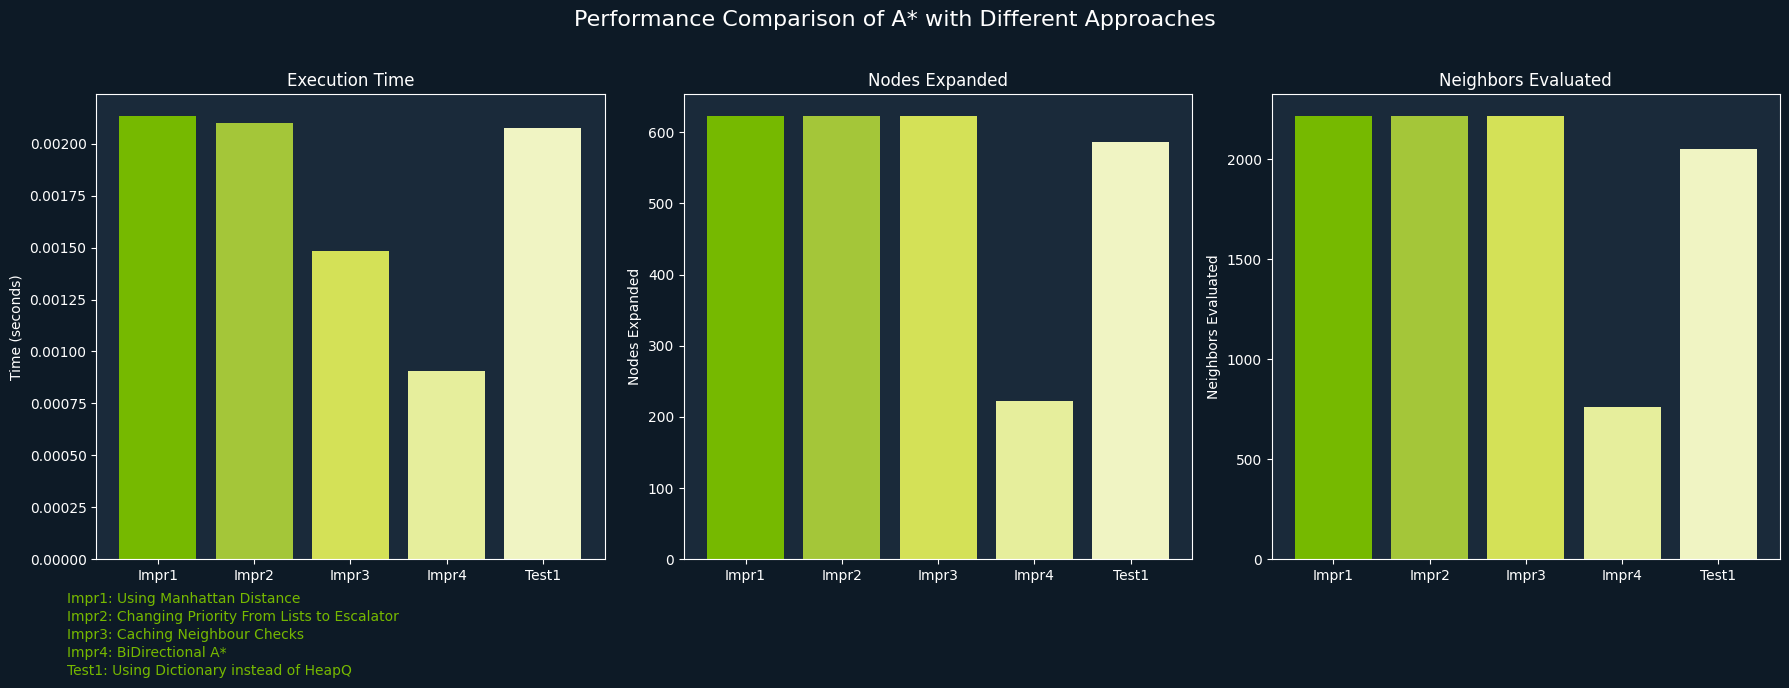

,Execution Time (s),Nodes Expanded,Neighbors Evaluated
Approach,,,
Impr1,0.002131,622.0,2213.0
Impr2,0.002101,622.0,2213.0
Impr3,0.001482,622.0,2213.0
Impr4,0.000907,222.0,759.0
Test1,0.002076,586.0,2052.0


In [ ]:
# List of lists to compare (replace Impr1, Impr2, Impr3, Impr4, Test1 with your data)
data = [Impr1, Impr2, Impr3, Impr4, Test1]  # Replace with your actual data

# Metrics names
metrics = ['Execution Time (s)', 'Nodes Expanded', 'Neighbors Evaluated']

# Creating an index for the x-axis
x = np.arange(len(data))

# Creating the figure and axes with NVIDIA dark background
plt.style.use('dark_background')  # Dark theme base
fig, ax = plt.subplots(1, 3, figsize=(18, 6), facecolor='#0D1A26')  # NVIDIA dark teal/gray
fig.patch.set_facecolor('#0D1A26')  # Set figure background

# NVIDIA-inspired green palette
nvidia_green = '#76B900'  # NVIDIA's signature green
bar_colors = [nvidia_green, '#A4C639', '#D4E157', '#E6EE9C', '#F0F4C3']  # Gradient of greens

# Plotting Execution Time
ax[0].bar(x, [d[0] for d in data], color=bar_colors)
ax[0].set_title('Execution Time', color='white', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(['Impr1', 'Impr2', 'Impr3', 'Impr4', 'Test1'], color='white')
ax[0].set_ylabel('Time (seconds)', color='white')
ax[0].set_facecolor('#1A2A3A')  # Slightly lighter background for contrast
ax[0].tick_params(axis='y', colors='white')

# Plotting Nodes Expanded
ax[1].bar(x, [d[1] for d in data], color=bar_colors)
ax[1].set_title('Nodes Expanded', color='white', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Impr1', 'Impr2', 'Impr3', 'Impr4', 'Test1'], color='white')
ax[1].set_ylabel('Nodes Expanded', color='white')
ax[1].set_facecolor('#1A2A3A')
ax[1].tick_params(axis='y', colors='white')

# Plotting Neighbors Evaluated
ax[2].bar(x, [d[2] for d in data], color=bar_colors)
ax[2].set_title('Neighbors Evaluated', color='white', fontsize=12)
ax[2].set_xticks(x)
ax[2].set_xticklabels(['Impr1', 'Impr2', 'Impr3', 'Impr4', 'Test1'], color='white')
ax[2].set_ylabel('Neighbors Evaluated', color='white')
ax[2].set_facecolor('#1A2A3A')
ax[2].tick_params(axis='y', colors='white')

# Adding custom labels below the graphs
legend_labels = [
    "Impr1: Using Manhattan Distance",
    "Impr2: Changing Priority From Lists to Escalator",
    "Impr3: Caching Neighbour Checks",
    "Impr4: BiDirectional A*",
    "Test1: Using Dictionary instead of HeapQ"
]

# Adding text outside the graphs with NVIDIA green and better spacing
for i, label in enumerate(legend_labels):
    fig.text(0.04, 0.01 - (i * 0.03), label, ha='left', va='top', fontsize=10, color=nvidia_green)

# Set the overall title and layout
fig.suptitle('Performance Comparison of A* with Different Approaches', fontsize=16, color='white')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# Create a DataFrame with approaches as rows and metrics as columns
approaches = ['Impr1', 'Impr2', 'Impr3', 'Impr4', 'Test1']
df = pd.DataFrame(data, index=approaches, columns=metrics)

# Rename index for clarity
df.index.name = 'Approach'

# Define NVIDIA-inspired styling
nvidia_style = [
    {'selector': 'th', 'props': [('background-color', '#0D1A26'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'td', 'props': [('background-color', '#1A2A3A'), ('color', '#76B900'), ('text-align', 'center'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#2A3B4A')]},
    {'selector': 'caption', 'props': [('caption-side', 'top'), ('color', 'white'), ('font-size', '16px'), ('padding', '10px')]}
]

# Apply styling and render to HTML
styled_df = df.style.set_table_styles(nvidia_style).set_caption("A* Performance Metrics (NVIDIA Theme)")

df.head()